In [2]:
import os
import sys
sys.path.append('../')
sys.path.append('../score/')
sys.path.append('../alpha-transform/')
from score import score
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils.utils_test import estimate_shear_new

/home/tianaoli/.conda/envs/astro/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# %% load data
psf_im = torch.load("psf_23.5_0.pth").numpy()
obs_im = torch.load("obs_23.5_0.pth").numpy()
gt_im = torch.load("gt_23.5_0.pth").numpy()

In [4]:
# %% perform deconvolution of the chosen galaxy image for gamma = 0 and 1
#initiate two instances of score
n_starlet = 4 #number of starlet scales
n_shearlet = 3 #number of shearlet scales
lip_eps = 1e-3 #error upperbound for Lipschitz constant
tolerance = 1e-6 #to test convergence
n_itr = 100 #number of iteration
k = 4 #Set k for k-sigma hard thresholding
beta_factor = 0.95 #to ensure that beta is not too big
rip = True #Removal of Isolated Pixel in the solution
first_guess = np.ones((48,48))/(48*48) #first guess
g1 = score(gamma=1, n_starlet=n_starlet, verbose=False, lip_eps=lip_eps, n_itr=n_itr, k=k, beta_factor=beta_factor, rip=rip, first_guess=first_guess)


In [5]:
#loop
# for obs, psf, gt in zip(gals_obs,psfs,gals):
#deconvolve
g1.deconvolve(obs=obs_im, ground_truth=gt_im, psf=psf_im)
# g0.deconvolve(obs=obs_im,ground_truth=gt_im,psf=psf_im)
#update ellipticity error lists
rec = g1.solution
# g0_error_list += [g0.relative_ell_error]

/home/tianaoli/Galaxy-Deconv/score/cadmos_lib.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff[s] = trafo.adjoint_transform(temp, do_norm=False)


(0.16745303034391867, -0.06087914214514936, 0.17817628158565507)
(0.05782768398656612, 0.0031675633620032785, 0.05791437207552596)
(0.05546653337618195, 0.13580070581830833, 0.14669140406145764)


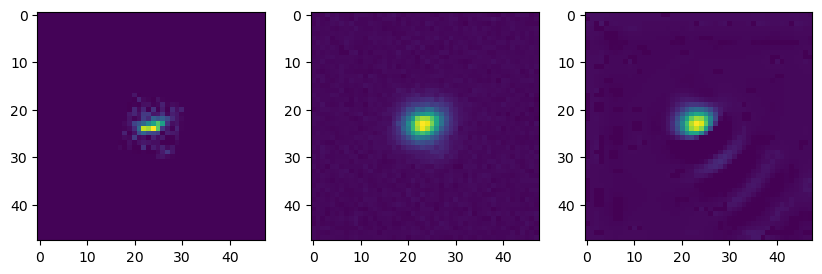

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.imshow(gt_im)
plt.subplot(1,3,2)
plt.imshow(obs_im)
plt.subplot(1,3,3)
plt.imshow(rec)

print(estimate_shear_new(gt_im))
print(estimate_shear_new(obs_im))
print(estimate_shear_new(rec))